In [1]:
# standard imports
import os
import datetime
from pathlib import Path
from collections import defaultdict
import scipy
import random
import numpy as np
#import xarray as xr
import pandas as pd
import joblib
import pickle
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# machine learning libraries
import sklearn            # machine-learning libary with many algorithms implemented
import xgboost as xgb     # extreme gradient boosting (XGB
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, max_error, mean_squared_error, mean_absolute_error, median_absolute_error

In [3]:
# shape library
import shap

In [4]:
# print the JS visualization code to the notebook
shap.initjs()

In [5]:
os.getcwd()

'/Users/tomislav_galjanic/Documents/Tomislav/Columbia/Courses/Fall 2021/ENGI E4800/Tedesco/Modeling'

In [53]:
#train_df = pd.read_csv('Data/train.csv')
#test_df = pd.read_csv('Data/test.csv')

train_df = pd.read_csv('/Users/tomislav_galjanic/Documents/Tomislav/Columbia/Courses/Fall 2021/ENGI E4800/Tedesco/SEPHER 2.0/Model Files/train.csv')
test_df = pd.read_csv('/Users/tomislav_galjanic/Documents/Tomislav/Columbia/Courses/Fall 2021/ENGI E4800/Tedesco/SEPHER 2.0/Model Files/test.csv')

In [54]:
train_df.describe()

FIPS      EP_UNEMP         EP_PCI        EP_POV      EP_NOVEH  \
count  1.128800e+04  11161.000000   11170.000000  11156.000000  11151.000000   
mean   3.199800e+10      8.051823   28122.777798     16.811725      9.597830   
std    1.591068e+10      5.561088   13125.373612     12.826185     12.276195   
min    1.001020e+09      0.000000       6.000000      0.000000      0.000000   
25%    1.911300e+10      4.400000   19791.250000      7.500000      2.600000   
50%    3.708507e+10      6.600000   25439.000000     13.400000      5.500000   
75%    4.103900e+10     10.100000   33012.250000     22.700000     11.300000   
max    5.604300e+10     59.300000  140255.000000    100.000000    100.000000   

          EP_NOHSDP     EP_MOBILE     EP_MINRTY      EP_CROWD      EP_AGE65  \
count  11174.000000  11154.000000  11244.000000  11244.000000  11174.000000   
mean      12.900385      6.815896     32.811170      2.499671     15.554555   
std        9.430543     11.572135     28.203645      3.508581      7.739766   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.900000      0.000000      9.400000      0.400000     10.600000   
50%       10.500000      1.000000     23.500000      1.500000     14.900000   
75%       17.775000      9.000000     50.200000      3.200000     19.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

       ...         WHITE      HISPANIC     WFIR_EALT     HRCN_EALT  \
count  ...  11288.000000  11288.000000  1.123000e+04  1.123100e+04   
mean   ...    132.702162     12.922927  1.023808e+04  5.849641e+04   
std    ...    133.345084     32.365023  7.437438e+04  2.725665e+05   
min    ...      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%    ...     39.000000      1.000000  0.000000e+00  1.143159e+03   
50%    ...    108.000000      4.000000  0.000000e+00  8.106966e+03   
75%    ...    188.000000     12.000000  3.917749e+02  2.845774e+04   
max    ...   2465.000000    907.000000  3.834543e+06  7.605758e+06   

          CFLD_EALT     RFLD_EALT      HWAV_EALT    POPULATION  EVICTION.RATE  \
count  1.123100e+04  1.123100e+04   11231.000000  11282.000000   11288.000000   
mean   1.094124e+04  4.582394e+04   11452.362581   4260.014891       3.350531   
std    2.913504e+05  1.364337e+05   41223.753101   2133.741348      14.094240   
min    0.000000e+00  0.000000e+00       0.000000      0.000000       0.000000   
25%    0.000000e+00  1.591719e+03     274.319400   2834.000000       0.990000   
50%    0.000000e+00  1.211163e+04    3209.438000   3998.000000       2.150000   
75%    8.259673e-01  4.118315e+04    9203.162912   5360.000000       4.260000   
max    2.792418e+07  6.814114e+06  799145.000000  38137.000000    1400.000000   

          EVICTIONS  
count  11288.000000  
mean      21.805634  
std       31.021091  
min        0.000000  
25%        4.000000  
50%       11.000000  
75%       26.000000  
max      385.000000  

[8 rows x 24 columns]

In [55]:
test_df.describe()

FIPS     EP_UNEMP         EP_PCI       EP_POV     EP_NOVEH  \
count  2.822000e+03  2783.000000    2788.000000  2779.000000  2777.000000   
mean   3.219825e+10     8.108983   28023.462697    16.994674     9.632913   
std    1.588141e+10     5.698236   13454.885535    12.922726    12.321752   
min    1.001020e+09     0.000000     857.000000     0.000000     0.000000   
25%    1.913244e+10     4.300000   19609.500000     7.500000     2.500000   
50%    3.708507e+10     6.600000   25207.000000    13.700000     5.400000   
75%    4.104195e+10    10.100000   33042.750000    22.900000    11.300000   
max    5.604300e+10    50.000000  139678.000000   100.000000    84.000000   

         EP_NOHSDP    EP_MOBILE    EP_MINRTY     EP_CROWD     EP_AGE65  ...  \
count  2789.000000  2778.000000  2812.000000  2812.000000  2790.000000  ...   
mean     12.999068     6.723614    33.088656     2.485811    15.601290  ...   
std       9.358142    11.561316    28.409185     3.830939     7.973243  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.700000     0.000000     9.300000     0.400000    10.700000  ...   
50%      10.700000     0.900000    24.350000     1.400000    14.900000  ...   
75%      18.200000     8.600000    50.625000     3.200000    19.100000  ...   
max      67.500000    88.500000   100.000000   100.000000    87.300000  ...   

             WHITE     HISPANIC     WFIR_EALT     HRCN_EALT     CFLD_EALT  \
count  2822.000000  2822.000000  2.804000e+03  2.804000e+03  2.804000e+03   
mean    133.981219    13.461729  8.654265e+03  5.963090e+04  6.643770e+03   
std     146.089300    35.128343  5.745834e+04  3.454240e+05  5.930260e+04   
min       0.000000     0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%      36.250000     1.000000  0.000000e+00  1.147757e+03  0.000000e+00   
50%     105.000000     4.000000  0.000000e+00  7.671157e+03  0.000000e+00   
75%     191.000000    13.000000  3.499825e+02  2.752226e+04  3.860766e-01   
max    2642.000000   747.000000  1.897794e+06  1.275826e+07  1.775419e+06   

          RFLD_EALT      HWAV_EALT    POPULATION  EVICTION.RATE    EVICTIONS  
count  2.804000e+03    2804.000000   2820.000000    2822.000000  2822.000000  
mean   4.411912e+04   12468.930357   4327.400355       3.792842    22.066265  
std    1.313026e+05   44676.635834   2364.472729      21.895827    31.824830  
min    0.000000e+00       0.000000      0.000000       0.000000     0.000000  
25%    1.420321e+03     240.441375   2883.250000       0.990000     4.000000  
50%    1.187136e+04    3336.688000   4080.500000       2.160000    11.000000  
75%    3.981086e+04    9514.301250   5419.000000       4.220000    27.000000  
max    3.477010e+06  664983.900000  53812.000000     900.000000   346.000000  

[8 rows x 24 columns]

In [67]:
def evictions_per_pop(population, evictions):
    if population > 0:
        return 1000 * evictions/population
    else:
        return np.nan

In [68]:
train_df['EVICTIONS_PP'] = train_df.apply(lambda x: evictions_per_pop(x['POPULATION'], x['EVICTIONS']), axis=1)
test_df['EVICTIONS_PP'] = test_df.apply(lambda x: evictions_per_pop(x['POPULATION'], x['EVICTIONS']), axis=1)

In [78]:
sum(train_df['EVICTIONS_PP'].isna())

113

In [79]:
XY_var = list(train_df.columns)
XY_var.remove('EVICTIONS')
XY_var.remove('EVICTION.RATE')
XY_var.remove('POPULATION')
XY_var.pop(0)
XY_var

['EP_UNEMP',
 'EP_PCI',
 'EP_POV',
 'EP_NOVEH',
 'EP_NOHSDP',
 'EP_MOBILE',
 'EP_MINRTY',
 'EP_CROWD',
 'EP_AGE65',
 'EP_AGE17',
 'NUM_LOANS',
 'MEAN_LOAN_AMOUNT',
 'AFAM',
 'WHITE',
 'HISPANIC',
 'WFIR_EALT',
 'HRCN_EALT',
 'CFLD_EALT',
 'RFLD_EALT',
 'HWAV_EALT',
 'EVICTIONS_PP']

In [80]:
train_df[XY_var].describe()

EP_UNEMP         EP_PCI        EP_POV      EP_NOVEH     EP_NOHSDP  \
count  11161.000000   11170.000000  11156.000000  11151.000000  11174.000000   
mean       8.051823   28122.777798     16.811725      9.597830     12.900385   
std        5.561088   13125.373612     12.826185     12.276195      9.430543   
min        0.000000       6.000000      0.000000      0.000000      0.000000   
25%        4.400000   19791.250000      7.500000      2.600000      5.900000   
50%        6.600000   25439.000000     13.400000      5.500000     10.500000   
75%       10.100000   33012.250000     22.700000     11.300000     17.775000   
max       59.300000  140255.000000    100.000000    100.000000    100.000000   

          EP_MOBILE     EP_MINRTY      EP_CROWD      EP_AGE65      EP_AGE17  \
count  11154.000000  11244.000000  11244.000000  11174.000000  11244.000000   
mean       6.815896     32.811170      2.499671     15.554555     22.098630   
std       11.572135     28.203645      3.508581      7.739766      6.668187   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      9.400000      0.400000     10.600000     18.800000   
50%        1.000000     23.500000      1.500000     14.900000     22.400000   
75%        9.000000     50.200000      3.200000     19.000000     26.000000   
max      100.000000    100.000000    100.000000    100.000000     53.900000   

       ...  MEAN_LOAN_AMOUNT          AFAM         WHITE      HISPANIC  \
count  ...      10246.000000  11288.000000  11288.000000  11288.000000   
mean   ...        213.905225     15.183558    132.702162     12.922927   
std    ...        538.806869     35.131957    133.345084     32.365023   
min    ...          1.000000      0.000000      0.000000      0.000000   
25%    ...        112.721250      0.000000     39.000000      1.000000   
50%    ...        157.369050      4.000000    108.000000      4.000000   
75%    ...        239.889775     15.000000    188.000000     12.000000   
max    ...      44502.500000   1260.000000   2465.000000    907.000000   

          WFIR_EALT     HRCN_EALT     CFLD_EALT     RFLD_EALT      HWAV_EALT  \
count  1.123000e+04  1.123100e+04  1.123100e+04  1.123100e+04   11231.000000   
mean   1.023808e+04  5.849641e+04  1.094124e+04  4.582394e+04   11452.362581   
std    7.437438e+04  2.725665e+05  2.913504e+05  1.364337e+05   41223.753101   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  1.143159e+03  0.000000e+00  1.591719e+03     274.319400   
50%    0.000000e+00  8.106966e+03  0.000000e+00  1.211163e+04    3209.438000   
75%    3.917749e+02  2.845774e+04  8.259673e-01  4.118315e+04    9203.162912   
max    3.834543e+06  7.605758e+06  2.792418e+07  6.814114e+06  799145.000000   

       EVICTIONS_PP  
count  11175.000000  
mean       5.610170  
std        7.937763  
min        0.000000  
25%        0.971912  
50%        2.638522  
75%        6.749304  
max      153.846154  

[8 rows x 21 columns]

In [81]:
corr_train = train_df[XY_var].corr()
corr_train_df = pd.DataFrame(corr_train, index=XY_var, columns=XY_var)

<Axes:title={'center':'Training data corrrelation'}>

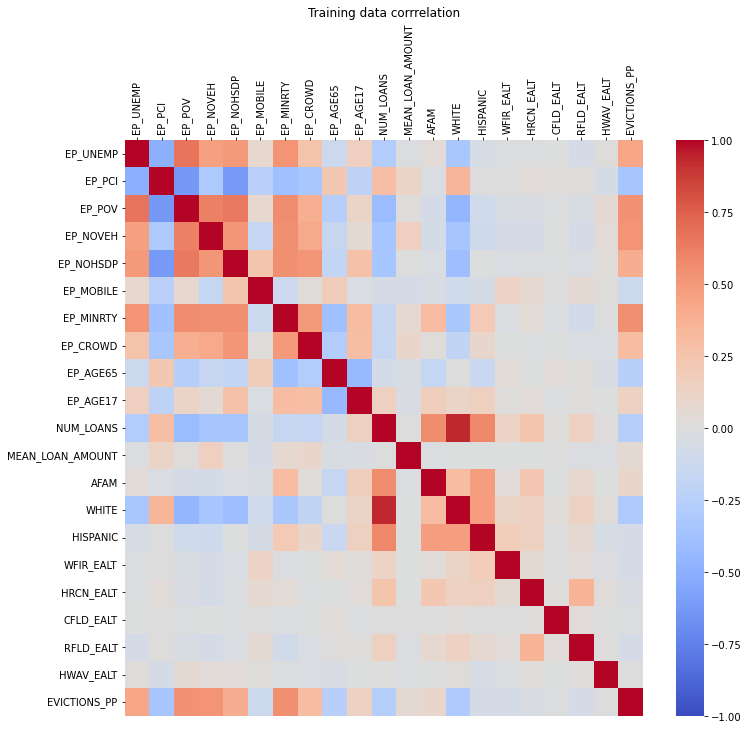

In [82]:
fig = plt.figure(figsize = (9,8))
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_ticks_position("top")
plt.title("Training data corrrelation")
sns.heatmap(corr_train_df, center = 0, vmin=-1, vmax=1, cmap = 'coolwarm')

In [83]:
X_var = copy.deepcopy(XY_var)
X_var.remove('EP_PCI')
X_var.remove('NUM_LOANS')
Y_var = []
Y_var.append(X_var.pop(-1))

In [84]:
Y_var

['EVICTIONS_PP']

In [85]:
train_sel = ~train_df[Y_var].isna().any(axis=1)
sum(train_sel)

11175

In [86]:
#X_train = train_df.loc[train_sel,X_var].to_numpy()
#y_train = train_df.loc[train_sel,Y_var].to_numpy().ravel()
X_train = train_df.loc[train_sel,X_var]
y_train = train_df.loc[train_sel,Y_var]

In [87]:
test_sel = ~test_df[Y_var].isna().any(axis=1)
sum(test_sel)

2791

In [88]:
#X_test = test_df.loc[test_sel,X_var].to_numpy()
#y_test = test_df.loc[test_sel,Y_var].to_numpy().ravel()
X_test = test_df.loc[test_sel,X_var]
y_test = test_df.loc[test_sel,Y_var]

## XGBoost Model Specification

In [89]:
# Parameter grids
xg_param_grid = {"n_estimators":[50, 100, 250, 500],
                 "max_depth":[2,3,4,5]
                }

In [90]:
kf = KFold(n_splits=5).split(X_train,y_train)
xg_model = XGBRegressor(random_state=123)
grid = GridSearchCV(xg_model, xg_param_grid, scoring='neg_mean_squared_error', cv=kf, return_train_score=False, refit=True)

In [91]:
print(datetime.datetime.now())

grid.fit(X_train,y_train)
best_params = grid.best_params_
print(best_params)

print(datetime.datetime.now())

2021-11-24 13:47:39.937850
{'max_depth': 5, 'n_estimators': 50}
2021-11-24 13:48:48.490147


In [92]:
# Fit the model on train data using optimal hyperparameters 
xg_model = XGBRegressor(random_state=123, **best_params)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## XGBoost Model evaluation

In [93]:
def evaluate_predict(y, pred):
    scores = {
        'mse':mean_squared_error(y, pred),
        'rmse':np.sqrt(mean_squared_error(y, pred)),
        'mae':mean_absolute_error(y, pred),
        'medae':median_absolute_error(y, pred),
        'max_error':max_error(y, pred),
        'bias':pred.mean() - y.mean(),
        'r2':r2_score(y, pred),
        'corr':np.corrcoef(y,pred)[0,1],
        }
    return scores

### Train data metrics

In [94]:
# Calculate test data error metrics
y_pred_train = xg_model.predict(X_train)

resid_train = y_train['EVICTIONS_PP'].values - y_pred_train
df_results_train = pd.DataFrame({'y_train':y_train['EVICTIONS_PP'].values, 'y_pred_train': y_pred_train, 'resid_train': resid_train})

In [95]:
train_scores = evaluate_predict(y_train['EVICTIONS_PP'].values, y_pred_train)
train_scores

{'mse': 13.749655115403446,
 'rmse': 3.7080527390267046,
 'mae': 2.2565859251367355,
 'medae': 1.3344583153981633,
 'max_error': 60.21287591350155,
 'bias': -0.001442020926984533,
 'r2': 0.7817599556285451,
 'corr': 0.8871409563767859}

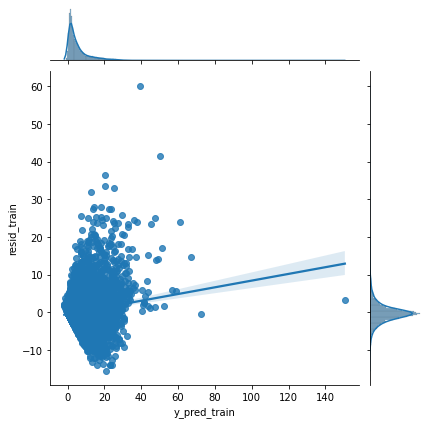

In [96]:
sns.jointplot(x = 'y_pred_train', y = 'resid_train', data = df_results_train, kind = 'reg')

### Test data metrics

In [97]:
# Calculate test data error metrics
y_pred_test = xg_model.predict(X_test)

resid_test = y_test['EVICTIONS_PP'].values - y_pred_test
df_results = pd.DataFrame({'y_test':y_test['EVICTIONS_PP'].values, 'y_pred_test': y_pred_test, 'resid_test': resid_test})

In [98]:
test_scores = evaluate_predict(y_test['EVICTIONS_PP'].values, y_pred_test)
test_scores

{'mse': 126.66247606485656,
 'rmse': 11.25444250351196,
 'mae': 3.1204532447942332,
 'medae': 1.4922795463585812,
 'max_error': 523.5993553049424,
 'bias': -0.12809747414383477,
 'r2': 0.21274290752981617,
 'corr': 0.46169720726193747}

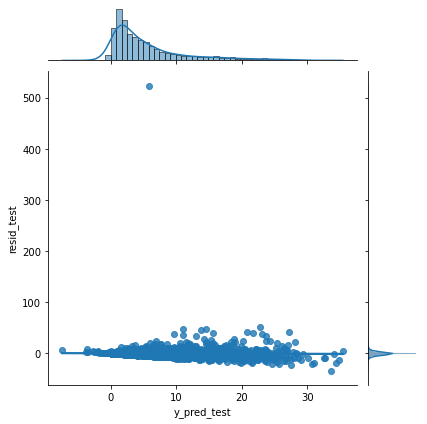

In [99]:
sns.jointplot(x = 'y_pred_test', y = 'resid_test', data = df_results, kind = 'reg')

[Text(0.5, 0, 'y_test predicted'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'Histogram of y_test predicted'),
 (0.0, 2500.0)]

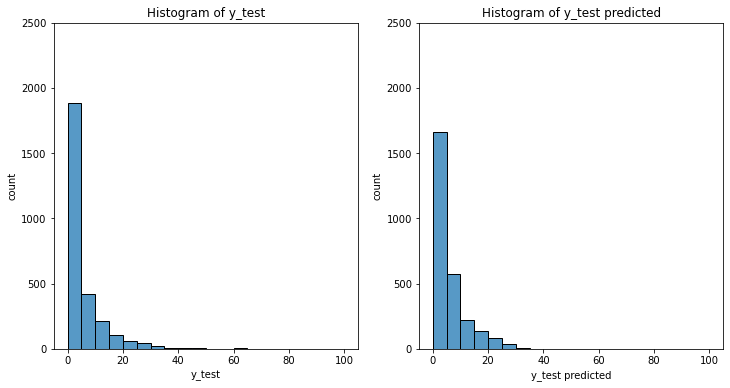

In [102]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
sns.histplot(y_pred_test, kde=False,  binwidth = 5, binrange = (0,100), ax = ax[1])
sns.histplot(y_test['EVICTIONS_PP'], kde=False, binwidth = 5, binrange = (0,100), ax = ax[0])

ax[0].set(xlabel='y_test', ylabel='count', title='Histogram of y_test', ylim=[0,2500])
ax[1].set(xlabel='y_test predicted', ylabel='count', title='Histogram of y_test predicted', ylim=[0,2500])

## Feature importance

In [103]:
# explain the model's predictions using SHAP
t_explainer = shap.TreeExplainer(xg_model)
t_shap_values = t_explainer(X_test)
shap_values = t_explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [104]:
# visualize all the training set predictions
shap.plots.force(t_shap_values)

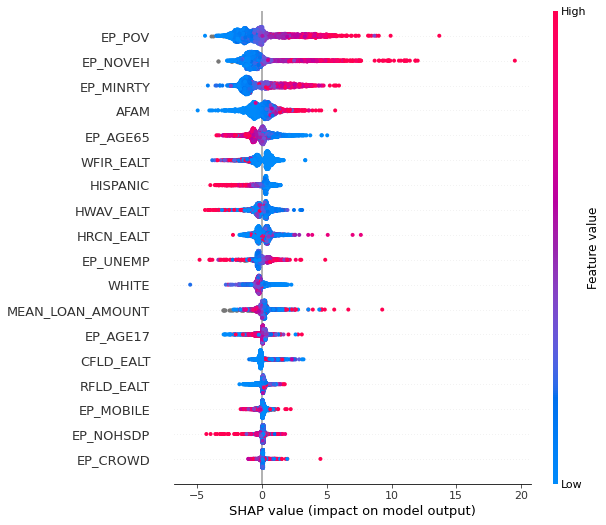

In [105]:
shap.plots.beeswarm(t_shap_values, max_display=20)

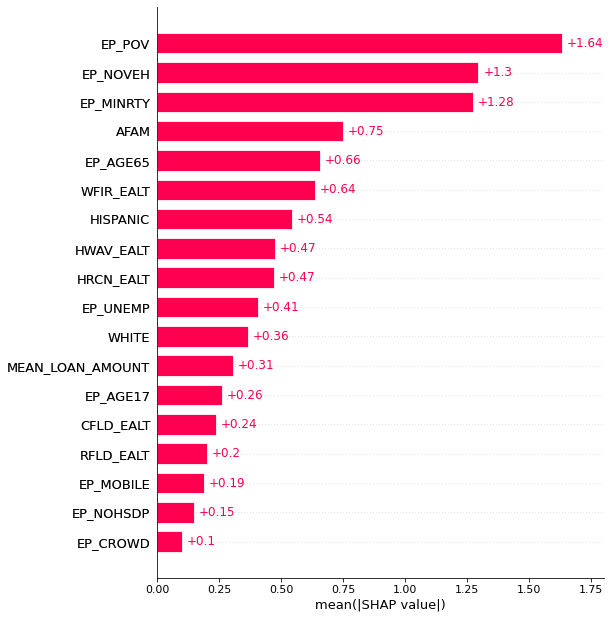

In [106]:
shap.plots.bar(t_shap_values, max_display=20)

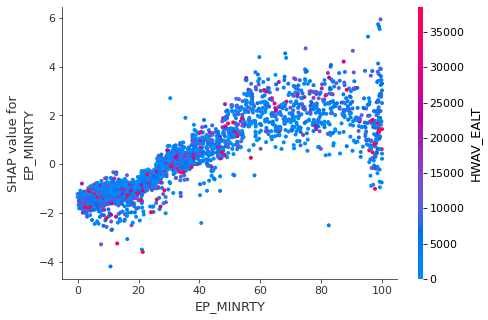

In [107]:
shap.dependence_plot("EP_MINRTY", shap_values, X_test, interaction_index="HWAV_EALT")

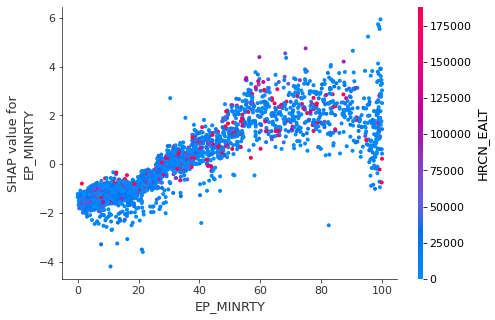

In [108]:
shap.dependence_plot("EP_MINRTY", shap_values, X_test, interaction_index="HRCN_EALT")

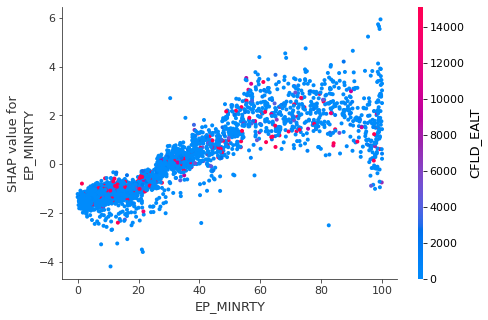

In [109]:
shap.dependence_plot("EP_MINRTY", shap_values, X_test, interaction_index="CFLD_EALT")

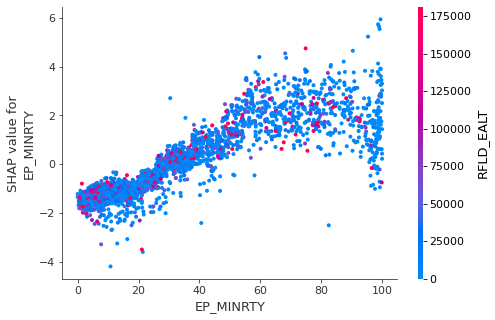

In [110]:
shap.dependence_plot("EP_MINRTY", shap_values, X_test, interaction_index="RFLD_EALT")

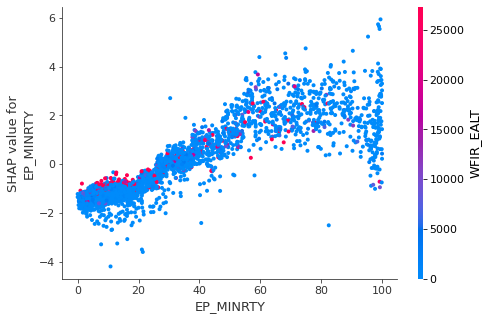

In [111]:
shap.dependence_plot("EP_MINRTY", shap_values, X_test, interaction_index="WFIR_EALT")

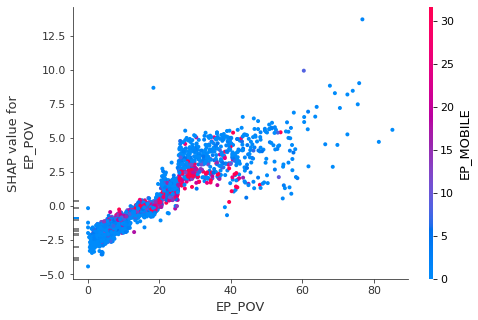

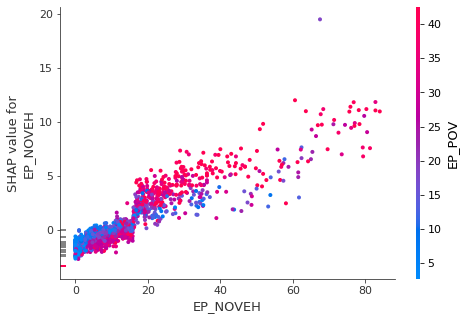

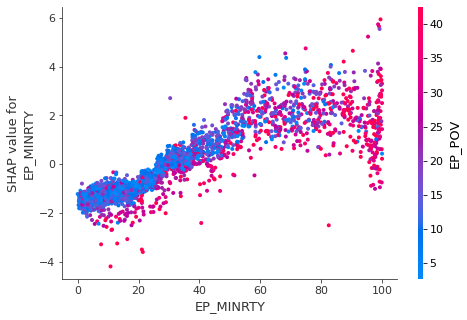

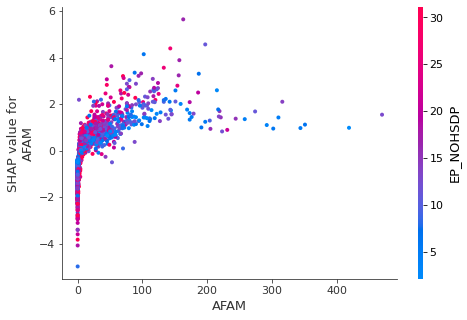

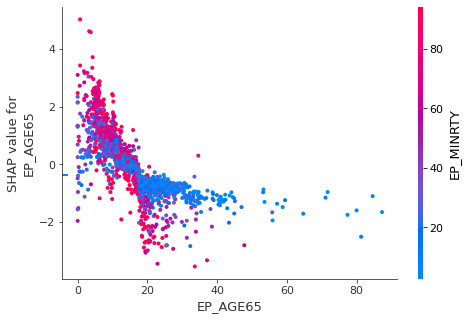

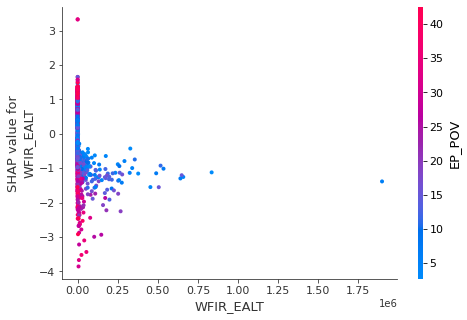

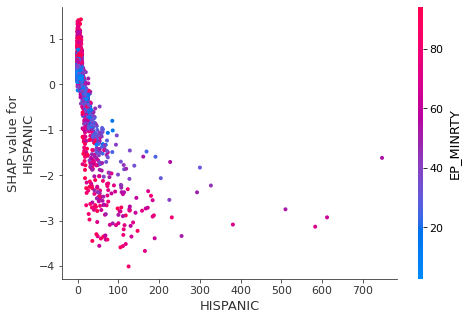

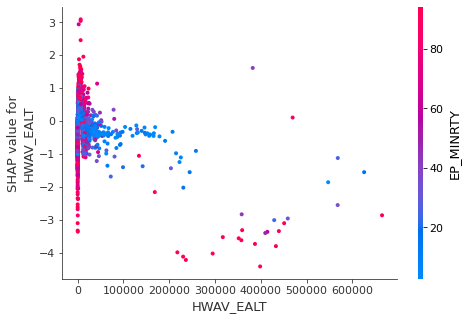

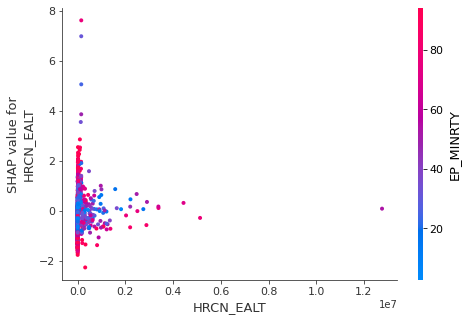

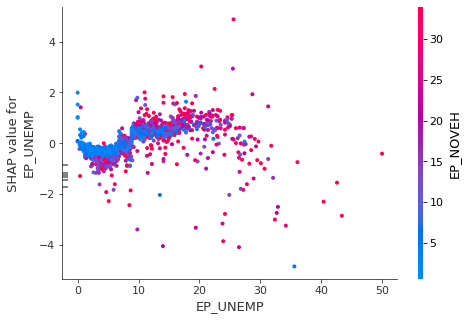

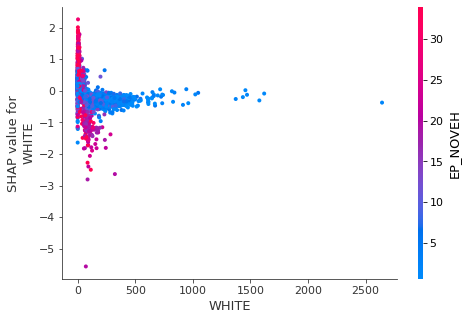

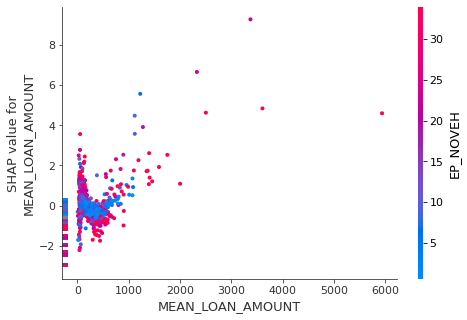

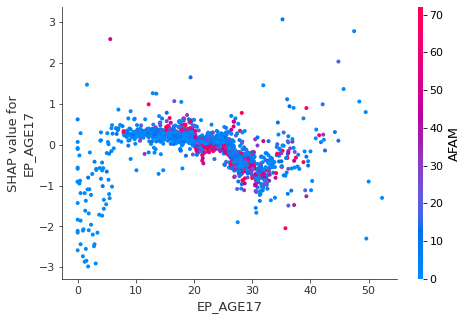

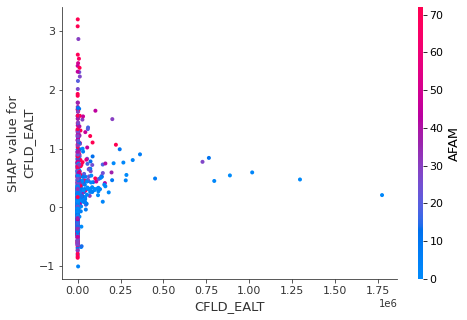

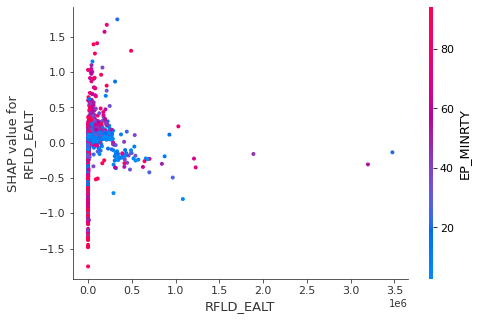

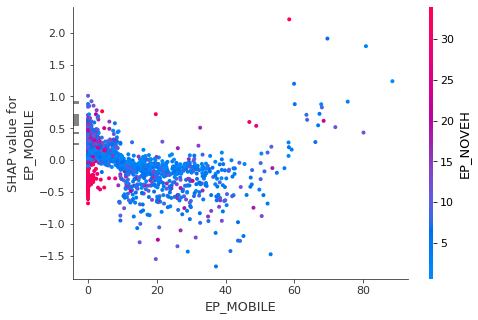

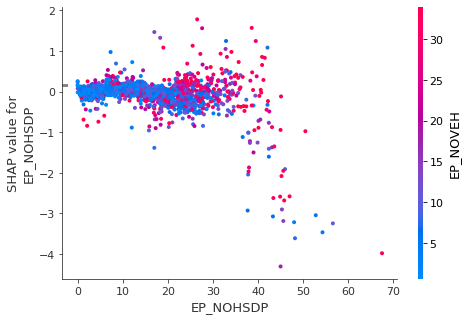

In [112]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(17):
    shap.dependence_plot(top_inds[i], shap_values, X_test)